# Purchase amount prediction model

## Evironment Set Up

In [52]:
import sys
import os

# Add project root to sys.path for easy imports
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [53]:
# Import modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from src.feature_engineering import FeatureEngineering
from src.visualisation_tools import Visualisation

In [54]:
# Load the data set
df = pd.read_csv('../data/customer_data.csv')


## Data Processing

### Handling Outliers

In [55]:

# Detect outliers for purchase_amount
outliers, purchase_amount_lower_bound, purchase_amount_upper_bound = FeatureEngineering.identify_outliers(df, 'purchase_amount')

# Cap the outliers at the upper bound
df.loc[(df['purchase_amount'] > purchase_amount_upper_bound), 'purchase_amount'] = int(purchase_amount_upper_bound)


## Split the Dataset

In [56]:
X = df[['income']]
y = df['purchase_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Model

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the Model

In [58]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Squared Error: 2337297.247456583
Mean Absolute Error: 1104.7002729827261
R² Score: 0.898043074037824


R² Score is good as 89.8% of the variance in purchase amount is explained by the model.

Mean Absolute Error looks high but compare to the mean of 'purchase_amount', 9,634.79, the MAE is about 11.5% which is not perfect but good estimate.

Mean Squared Error is used to compare performances of different models. To reduce this adding additional features might be helpful.

## Visualise the Model

In [59]:
# Compress data to dataframe

df_puchase_amount_income_prediction = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

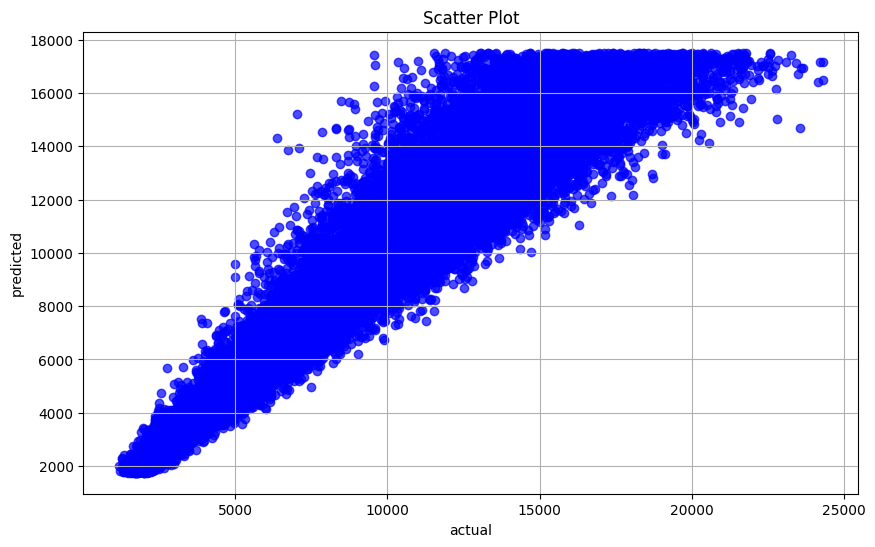

In [60]:
Visualisation.create_scatter_plot(df_puchase_amount_income_prediction, 'actual', 'predicted')